In [1]:
# !pip install --upgrade google-cloud-bigquery-storage pandas

In [2]:
from google.colab import auth
auth.authenticate_user()
from google.cloud import bigquery
import pandas as pd

project_id = 'wpac-449904'
dataset_id = 'wpac_data'
# Create a storage client
client = bigquery.Client(project=project_id)

In [3]:
pd.set_option('display.max_columns', None)

careers = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_careers`").to_dataframe()
jobs = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_jobs`").to_dataframe()
all_time_connect = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_all_time_connect`").to_dataframe()
individual = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_individual`").to_dataframe()
other_events = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_other_events`").to_dataframe()
programs = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_programs`").to_dataframe()
resources = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_resources`").to_dataframe()
survey = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_survey`").to_dataframe()



In [4]:
all_time_connect.head()

,_id,collectionType,eventName,createdAt,partnerRegion,sessionId,data_careerId,data_jobId,data_programId,data_resourceId,WPA_id
0,6663e9a6daf5f872d641dce5,NA,edited status,2024-06-08 09:18:30+00:00,Atlanta,e059e07d-48c1-49e4-af6e-162add85fc9b,NA,NA,630c6a622c7386c831f3d16c,NA,WPA_105333
1,6648b3e7bbe71cd48bb64f6c,NA,edited status,2024-05-18 17:57:59+00:00,Atlanta,fce6d678-5e24-4357-aa02-15a87f4e2f97,NA,NA,64c976148776a05127ca769e,NA,WPA_106152
2,6648dec733dcbb5ec5de8904,NA,edited status,2024-05-18 21:00:58+00:00,Atlanta,3ba85c3e-d4b1-4483-8412-2879a85a3fa6,NA,NA,64c9772a8776a05127ca867d,NA,WPA_106199
3,6648dec9bbe71cd48bb6cc74,NA,edited status,2024-05-18 21:01:00+00:00,Atlanta,3ba85c3e-d4b1-4483-8412-2879a85a3fa6,NA,NA,64c9772a8776a05127ca867d,NA,WPA_106199
4,6678b884c8205e4485c657b3,NA,edited status,2024-06-24 04:06:27+00:00,Atlanta,fd45e415-3a71-4034-9856-a77045e05329,NA,NA,628aed8312545d84f96e82c7,NA,WPA_106392


In [5]:
programs.head()

,data_careerId,education,jobZone,onetTitle
0,63e542ec3f747a7a197b9bd9,5,4,Human Resources Specialists
1,63e543523f747a7a197b9c48,5,4,Software Quality Assurance Analysts and Testers
2,63e5434b3f747a7a197b9c41,5,4,Software Developers
3,63e543453f747a7a197b9c3a,5,4,Network and Computer Systems Administrators
4,63e5433e3f747a7a197b9c33,5,4,Graphic Designers


In [ ]:
merge1 = survey.merge(all_time_connect, on='WPA_id', how='left')
merge2 = merge1.merge(individual, on='WPA_id', how='left')
merge3 = merge2.merge(other_events, on='WPA_id', how='left')
merge4 = merge3.merge(jobs, on='data_jobId', how='left')
merge5 = merge4.merge(careers, on='data_careerId', how='left')

In [ ]:
for col in df.columns:
  # if df[col].nunique() == 2:
  if df[col].nunique() == 3:
    print(df[col].value_counts(dropna=False))
    print('-'*100)

rural_type
Non-Rural    141977
Rural         27710
NA            15763
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
latestSalaryType
NA      173465
hr        9745
year      2240
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
completed_career_milestone
NA       123184
FALSE     52408
TRUE       9858
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
completed_jobs_milestone
NA       123184
FALSE     61439
TRUE        827
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
completed_training_milestone
NA       123184
FALSE     60923
TRUE       1343
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
gender_

In [ ]:
df['myPathCompleted'] = df['myPathCompleted'].replace({'NA':'0', '1':'1'}).astype('int8')
df['workExperienceGroup'] = df['workExperienceGroup'].replace({'5+ years':'1', '<5 years':'0'}).astype('int8')
df['preferredRegionGroup'] = df['preferredRegionGroup'].replace({'Local':'0', 'National':'1'}).astype('int8')
df['completed_work_styles'] = df['completed_work_styles'].replace({'FALSE':'0', 'TRUE':'1'}).astype(bool)
df['retention'] = df['retention'].replace({'Never Returned':'0', 'Returned':'1'}).astype(bool)
df['gender_3'] = df['gender_3'].replace({'Female':'2', 'Male':'1', 'Other, declined':'0'})
df['completed_training_milestone'] = df['completed_training_milestone'].replace({'NA':'0', 'FALSE':'1', 'TRUE':'2'})
df['completed_jobs_milestone'] = df['completed_jobs_milestone'].replace({'NA':'0', 'FALSE':'1', 'TRUE':'2'})
df['completed_career_milestone'] = df['completed_career_milestone'].replace({'NA':'0', 'FALSE':'1', 'TRUE':'2'})
df['latestSalaryType'] = df['latestSalaryType'].replace({'NA':'0', 'hr':'1', 'year':'2'})
df['rural_type'] = df['rural_type'].replace({'NA':'1', 'Rural': '0', 'Non-Rural':'1'})


In [ ]:
df.replace("NA", pd.NA, inplace=True)
df[['lastLoggedInAt', 'updatedAt', 'targetDate', ]] = df[['lastLoggedInAt', 'updatedAt', 'targetDate', ]].apply(pd.to_datetime)


In [ ]:
df['race'] = df['race'].astype(object).fillna('Other')
df['race'] = df['race'].apply(lambda x: '1' if x == 'White' else '0').astype('int8')
df['race'].value_counts(dropna=False)

,count
race,
0,134896
1,50554


In [ ]:
df['educationAndWorkExperience'].replace("Decline to answer", pd.NA, inplace=True)
df['ed_work_exp_missing'] = df['educationAndWorkExperience'].isnull().astype('int8')
df['educationAndWorkExperience'] = df['educationAndWorkExperience'].astype(object).fillna('Missing')
print(df['educationAndWorkExperience'].value_counts(dropna=False))

educationAndWorkExperience
5-10 years     42364
15+ years      40668
Missing        31347
2-4 years      28732
< 2 years      26970
11-14 years    15369
Name: count, dtype: int64


<ipython-input-219-8fa2f2c9972b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['educationAndWorkExperience'].replace("Decline to answer", pd.NA, inplace=True)


In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185450 entries, 0 to 185449
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   rural_type                    185450 non-null  object             
 1   lastLoggedInAt                178471 non-null  datetime64[ns, UTC]
 2   myPathCompleted               185450 non-null  int8               
 3   preferredRegion               185436 non-null  object             
 4   preferredRegionGroup          185450 non-null  int8               
 5   createdAt                     185450 non-null  datetime64[us, UTC]
 6   updatedAt                     185225 non-null  datetime64[ns, UTC]
 7   educationAndWorkExperience    185450 non-null  object             
 8   workExperienceGroup           185450 non-null  int8               
 9   race                          185450 non-null  int8               
 10  highestEducationLeve

,rural_type,lastLoggedInAt,myPathCompleted,preferredRegion,preferredRegionGroup,createdAt,updatedAt,educationAndWorkExperience,workExperienceGroup,race,highestEducationLevel,careerGoalTitle,latestJobOnet,latestJobTitle,latestSalary,latestSalaryType,targetDate,targetSalary,activeMilestone,completed_work_styles,retention,completed_career_milestone,completed_jobs_milestone,completed_training_milestone,gender_3,birth_year,WPA_id,ed_work_exp_missing
0,1,2023-03-20 22:59:20+00:00,0,Atlanta,0,2022-02-01 23:48:35+00:00,2023-12-11 23:33:04+00:00,Missing,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,0,NaT,<NA>,careers,False,True,1,1,1,0,<NA>,WPA_15,1
1,1,2024-08-26 00:05:12+00:00,1,Atlanta,0,2022-04-05 01:35:28+00:00,2024-07-23 05:28:52+00:00,5-10 years,1,0,Some college,Computer User Support Specialist,43-4051.00,Customer Service Representative,31200,1,2024-08-22 08:00:00+00:00,60490,job,False,True,1,1,1,2,1992,WPA_137,0
2,1,2024-07-18 10:02:34+00:00,0,Atlanta,0,2022-06-09 21:41:11+00:00,2024-07-18 08:44:05+00:00,Missing,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,0,NaT,<NA>,training,False,True,1,1,1,0,<NA>,WPA_525,1
3,1,2024-03-13 02:09:41+00:00,1,Atlanta,0,2022-06-12 18:38:37+00:00,2024-03-13 02:07:41+00:00,Missing,0,1,<NA>,<NA>,<NA>,<NA>,<NA>,0,NaT,<NA>,job,False,True,1,1,1,0,1991,WPA_641,1
4,1,2024-04-27 08:15:31+00:00,1,Atlanta,0,2022-06-24 01:12:50+00:00,2024-04-27 08:10:27+00:00,11-14 years,1,1,High school diploma or equivalent,Graphic Designer,43-4051.00,Customer Service Representative,33280,1,2025-07-31 08:00:00+00:00,63410,job,False,True,1,1,1,0,1992,WPA_1224,0


In [ ]:
df['birth_year'] = pd.to_numeric(df['birth_year'], errors='coerce').astype('Int64')

# print(df.birth_year.value_counts(dropna=False))

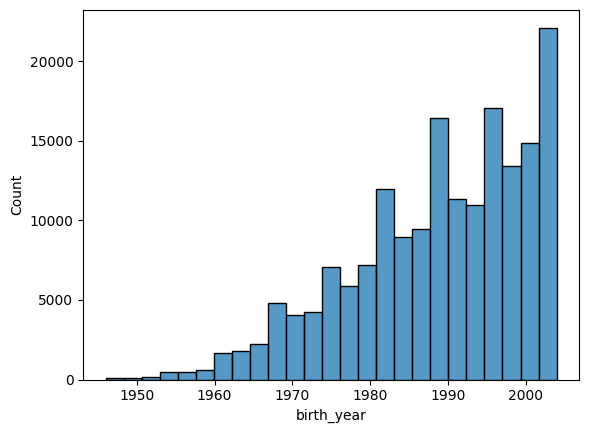

1991


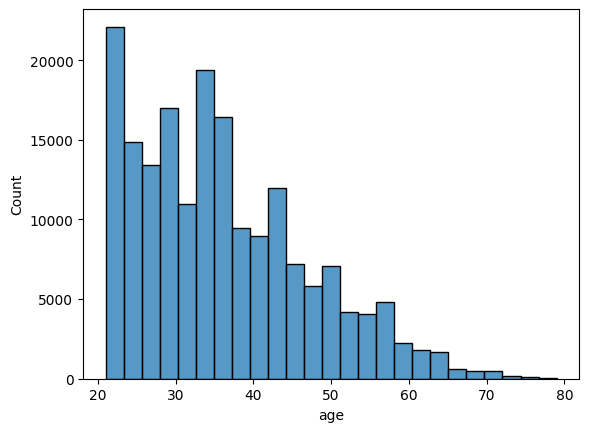

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='birth_year', bins=25)
plt.show()

median_birth_year = df.birth_year.median().astype(int)
print(median_birth_year)
df['birth_year'] = df['birth_year'].fillna(median_birth_year)
df['age'] = 2025 - df['birth_year']

sns.histplot(data=df, x='age', bins=25)
plt.show()

In [ ]:
#Dropping columns with excessive null values
df.drop(['latestJobOnet', 'latestJobTitle', 'latestSalary', 'targetDate', 'targetSalary', 'careerGoalTitle'], axis=1, inplace=True)

In [ ]:
ed_map = {
    'High school diploma or equivalent':'1',
    'Some college':'2',
    'Four-year college degree or higher':'5',
    "Associate's degree":'4',
    'Trade license or certificate':'3',
    'None':'0'
}
df['highestEducationLevel'].replace('Decline to answer', pd.NA, inplace=True)
df['highestEducationLevel'] = df['highestEducationLevel'].astype(object).fillna('Missing')
df['educ_level'] = df['highestEducationLevel'].isnull().astype('int8')
df['highestEducationLevel'] = df['highestEducationLevel'].replace(ed_map)

print(df['highestEducationLevel'].value_counts(dropna=False))

highestEducationLevel
1          55786
2          40955
5          31612
Missing    27954
4          14138
3           9554
0           5451
Name: count, dtype: int64


<ipython-input-224-261348c73a4e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['highestEducationLevel'].replace('Decline to answer', pd.NA, inplace=True)


In [ ]:
for col in df.columns:
  if df[col].dtype == object:
    df[col] = df[col].astype('category')
print(df.nunique())
df.info()

rural_type                           2
lastLoggedInAt                  178052
myPathCompleted                      2
preferredRegion                     30
preferredRegionGroup                 2
createdAt                       184781
updatedAt                       150101
educationAndWorkExperience           6
workExperienceGroup                  2
race                                 2
highestEducationLevel                7
latestSalaryType                     3
activeMilestone                      4
completed_work_styles                2
retention                            1
completed_career_milestone           3
completed_jobs_milestone             3
completed_training_milestone         3
gender_3                             3
birth_year                          59
WPA_id                          185450
ed_work_exp_missing                  2
age                                 59
educ_level                           1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

In [ ]:
df.head()

,rural_type,lastLoggedInAt,myPathCompleted,preferredRegion,preferredRegionGroup,createdAt,updatedAt,educationAndWorkExperience,workExperienceGroup,race,highestEducationLevel,latestSalaryType,activeMilestone,completed_work_styles,retention,completed_career_milestone,completed_jobs_milestone,completed_training_milestone,gender_3,birth_year,WPA_id,ed_work_exp_missing,age,educ_level
0,1,2023-03-20 22:59:20+00:00,0,Atlanta,0,2022-02-01 23:48:35+00:00,2023-12-11 23:33:04+00:00,Missing,0,0,Missing,0,careers,False,True,1,1,1,0,1991,WPA_15,1,34,0
1,1,2024-08-26 00:05:12+00:00,1,Atlanta,0,2022-04-05 01:35:28+00:00,2024-07-23 05:28:52+00:00,5-10 years,1,0,2,1,job,False,True,1,1,1,2,1992,WPA_137,0,33,0
2,1,2024-07-18 10:02:34+00:00,0,Atlanta,0,2022-06-09 21:41:11+00:00,2024-07-18 08:44:05+00:00,Missing,0,0,Missing,0,training,False,True,1,1,1,0,1991,WPA_525,1,34,0
3,1,2024-03-13 02:09:41+00:00,1,Atlanta,0,2022-06-12 18:38:37+00:00,2024-03-13 02:07:41+00:00,Missing,0,1,Missing,0,job,False,True,1,1,1,0,1991,WPA_641,1,34,0
4,1,2024-04-27 08:15:31+00:00,1,Atlanta,0,2022-06-24 01:12:50+00:00,2024-04-27 08:10:27+00:00,11-14 years,1,1,1,1,job,False,True,1,1,1,0,1992,WPA_1224,0,33,0


In [ ]:
df.activeMilestone = df.activeMilestone.fillna('job')
df.activeMilestone = df.activeMilestone.replace({'trabajo':'job'})
print(df.activeMilestone.value_counts(dropna=False))

activeMilestone
job         88406
training    59951
careers     37093
Name: count, dtype: int64


<ipython-input-227-efd1ebacfff5>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.activeMilestone = df.activeMilestone.replace({'trabajo':'job'})


In [ ]:
df.preferredRegion = df.preferredRegion.fillna('National')
df.preferredRegion.value_counts(dropna=False)

,count
preferredRegion,
National,65414
New York City,14106
Dallas,10692
Central Florida,10616
Los Angeles,10490
Atlanta,9034
Bay Area,8292
Philadelphia,8091
Charlotte,5942


In [ ]:
df['updatedAt'] = df['updatedAt'].fillna(df['updatedAt'].max())
df['lastLoggedInAt'] = df['lastLoggedInAt'].fillna(df['updatedAt'].max())


In [ ]:
df.isnull().sum()

,0
rural_type,0
lastLoggedInAt,0
myPathCompleted,0
preferredRegion,0
preferredRegionGroup,0
createdAt,0
updatedAt,0
educationAndWorkExperience,0
workExperienceGroup,0
race,0


In [ ]:
dataset_id = "wpac_data"

client = bigquery.Client(project=project_id)
datasets = [dataset.dataset_id for dataset in client.list_datasets()]
print("Available Datasets:", datasets)

if dataset_id not in datasets:
    print(f"Dataset {dataset_id} does not exist. Creating it now...")
    dataset_ref = client.dataset(dataset_id)
    dataset = bigquery.Dataset(dataset_ref)
    dataset.location = "US"  # Change if necessary
    client.create_dataset(dataset, exists_ok=True)
    print(f"Dataset {dataset_id} created.")


Available Datasets: ['wpac_data']


In [ ]:
import pandas_gbq

dataset_table = "wpac_data.cleaned_individual"  # Replace with dataset.table name

# Load your CSV into a DataFrame
csv_file_path = "cleaned_individual.csv"  # Replace with your actual file path
# df = pd.read_csv(csv_file_path)

# Use `pandas_gbq.to_gbq` to upload DataFrame
pandas_gbq.to_gbq(
    df,
    destination_table=dataset_table,
    project_id=project_id,
    if_exists="replace"  # "fail", "replace", "append"
)


100%|██████████| 1/1 [00:00<00:00, 7073.03it/s]
